In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import lightgbm as lgbm

In [4]:
with open('proper_integer_encoded_datas.pickle', 'rb') as handle:
    datasets = pickle.load(handle)
    
df_train = datasets[0]
df_test = datasets[1]

targets = df_train['HasDetections']
df_train.drop(['HasDetections'], axis = 1, inplace = True)

x_train, x_val, y_train, y_val = train_test_split(df_train, targets, 
                                                  test_size=0.15, stratify=targets,
                                                  random_state = 42)

Baseline Model (default LGBM parameters)

In [5]:
with open('baseline_lgbm.pickle', 'rb') as handle:
    baseline = pickle.load(handle)

In [6]:
baseline_df = pd.DataFrame({"Feature": baseline.feature_name_, "Importance": baseline.feature_importances_})

Text(0.5, 1.0, 'Baseline')

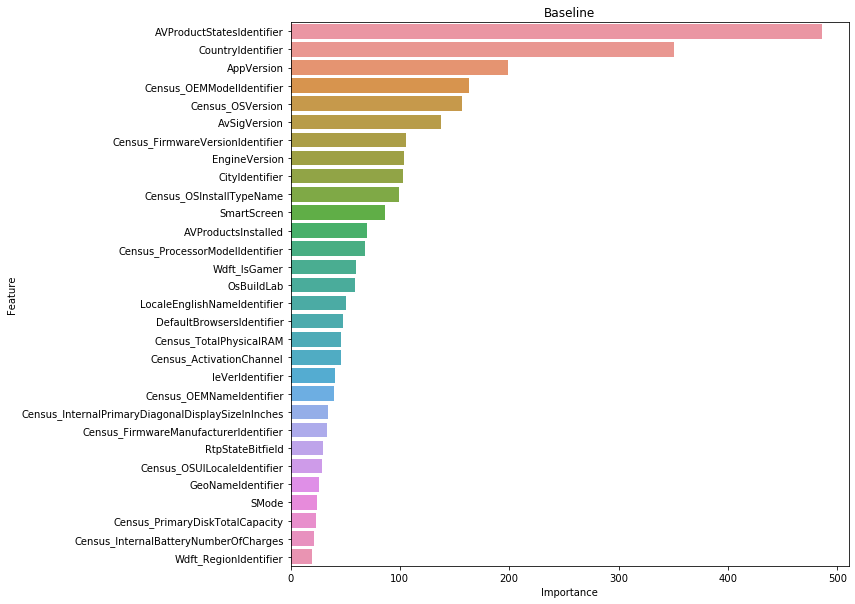

In [7]:
plt.figure(figsize = (10,10))
sns.barplot(data = baseline_df.sort_values(by = "Importance", ascending = False).head(30),
            y = 'Feature', x = "Importance")
plt.title("Baseline")

In [29]:
baseline.get_params

<bound method LGBMModel.get_params of LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device='cpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)>

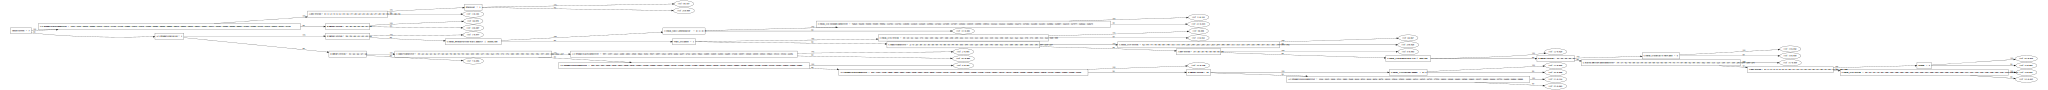

In [38]:
lgbm.create_tree_digraph(baseline)

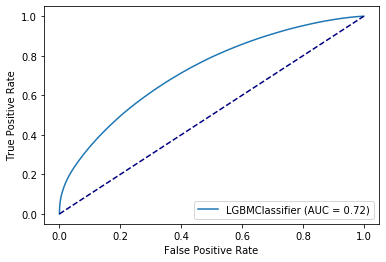

In [26]:
metrics.plot_roc_curve(baseline, x_val, y_val)
plt.plot([0,1], [0,1], ls = '--', color = 'navy')
plt.show()

Conditional Mutual Information Ranking (28 features used for training)

In [3]:
cmi_params = {'subsample': 0.9,
              'reg_alpha': 5,
              'num_leaves': 130,
              'n_estimators': 200,
              'min_child_samples': 500, 
              'learning_rate': 0.1, 
              'colsample_bytree': 0.6,
              'boosting_type': 'gbdt'}

In [10]:
with open('repeated_CMI_lgbm.pickle', 'rb') as handle:
    cmi_lgbm = pickle.load(handle)

In [11]:
cmi_df = pd.DataFrame({"Feature": cmi_lgbm.feature_name_, "Importance": cmi_lgbm.feature_importances_})

Text(0.5, 1.0, 'top 28 CMI Ranking')

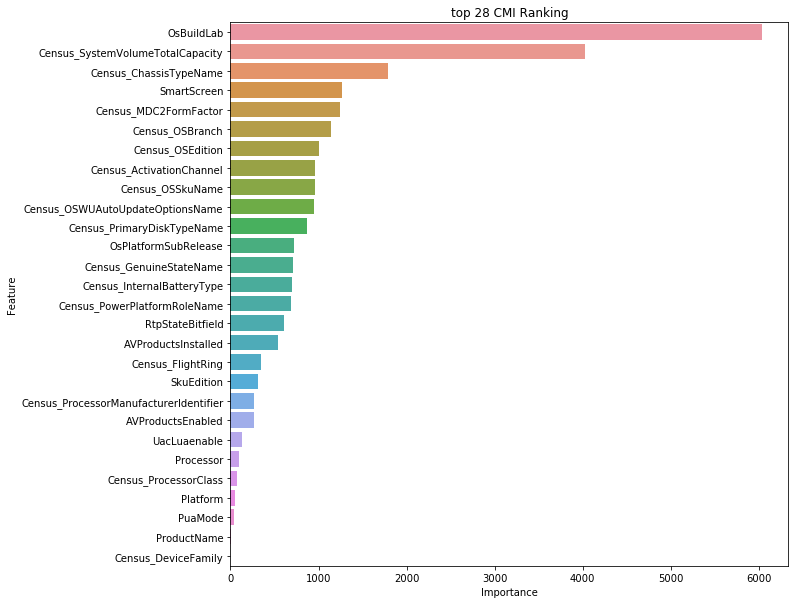

In [12]:
plt.figure(figsize = (10,10))
sns.barplot(data = cmi_df.sort_values(by = "Importance", ascending = False),
            y = 'Feature', x = "Importance")
plt.title("top 28 CMI Ranking")

In [13]:
cmi_lgbm.best_score_

defaultdict(collections.OrderedDict,
            {'valid_0': OrderedDict([('auc', 0.6842768548429157),
                          ('binary_logloss', 0.6337472841841375)])})

In [16]:
CI_feature_rank = [
 'Census_SystemVolumeTotalCapacity',
 'Census_PowerPlatformRoleName',
 'Census_ChassisTypeName',
 'Census_InternalBatteryType',
 'SmartScreen',
 'AVProductsInstalled',
 'Processor',
 'RtpStateBitfield',
 'OsBuildLab',
 'AVProductsEnabled',
 'Census_MDC2FormFactor',
 'Census_OSArchitecture',
 'PuaMode',
 'Census_ProcessorClass',
 'UacLuaenable',
 'Census_DeviceFamily',
 'ProductName',
 'Platform',
 'Census_FlightRing',
 'Census_GenuineStateName',
 'Census_ProcessorManufacturerIdentifier',
 'Census_OSWUAutoUpdateOptionsName',
 'OsPlatformSubRelease',
 'Census_OSSkuName',
 'Census_OSEdition',
 'SkuEdition',
 'Census_ActivationChannel',
 'Census_OSBranch',
 'Census_PrimaryDiskTypeName'
]

cols_to_drop = [col for col in df_train.columns if col not in CI_feature_rank]
df_train.drop(cols_to_drop, axis = 1, inplace = True)
df_test.drop(cols_to_drop, axis = 1, inplace = True)

x_train_cmi, x_val_cmi, y_train_cmi, y_val_cmi = train_test_split(df_train, targets, 
                                                  test_size=0.15, stratify=targets,
                                                  random_state = 42)

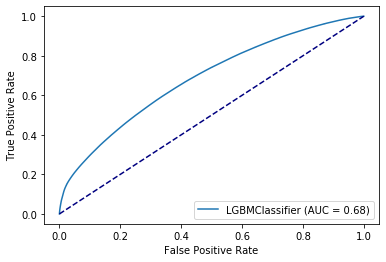

In [27]:
metrics.plot_roc_curve(cmi_lgbm, x_val_cmi, y_val_cmi)
plt.plot([0,1], [0,1], ls = '--', color = 'navy')
plt.show()

Kaggle Preprocessing

In [25]:
kagg_params = {
    'subsample': 0.4,
     'reg_alpha': 100,
     'num_leaves': 90,
     'n_estimators': 100,
     'min_child_samples': 100, 
     'learning_rate': 0.1,
     'colsample_bytree': 0.4,
     'boosting_type': 'gbdt'
}

In [26]:
kagg_feats = [
    'EngineVersion', 'AppVersion', 'AvSigVersion', 'RtpStateBitfield', 
    'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier', 'AVProductsInstalled',
    'AVProductsEnabled', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier',
    'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
    'OsBuildLab', 'IsProtected', 'IeVerIdentifier', 'SmartScreen', 'Census_MDC2FormFactor',
    'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorManufacturerIdentifier',
    'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
    'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM',
    'Census_ChassisTypeName', 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
    'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical',
    'Census_PowerPlatformRoleName', 'Census_InternalBatteryType', 'Census_InternalBatteryNumberOfCharges',
    'Census_OSVersion', 'Census_OSBranch', 'Census_OSBuildNumber', 'Census_OSBuildRevision',
    'Census_OSEdition', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName',
    'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_IsFlightingInternal',
    'Census_ThresholdOptIn', 'Census_FirmwareManufacturerIdentifier', 'Census_FirmwareVersionIdentifier',
    'Census_IsSecureBootEnabled', 'Census_IsWIMBootEnabled', 'Census_IsTouchEnabled',
    'Census_IsPenCapable', 'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer',
    'Wdft_RegionIdentifier', 'AppVersion2', 'CountryIdentifier', 'SkuEdition', 'Firewall',
    'Census_ProcessorCoreCount', 'Census_OSUILocaleIdentifier', 'Census_FlightRing', 'Lag1',
    'driveB', 'driveA']

In [27]:
kagg_FI = [145, 326,  91,  96,  68, 542,  56,  18, 519,  23, 303, 269, 4,  29,  43,  10,  16, 278,
  17, 176, 153,  46, 139, 653, 4, 528, 40,  56,  34,  39,  95,  48,  57,  28,  10,  16,
  10,  21, 494,  35, 7,  58, 50, 276, 82, 47, 150, 2, 21,  77, 359, 9, 21,  14,
   3, 9, 98, 170, 146, 858, 34, 18, 28, 100, 25, 336, 367, 0]

In [28]:
kagg_df = pd.DataFrame({"Feature": kagg_feats, "Importance": kagg_FI})

Text(0.5, 1.0, 'KAGGLE FE')

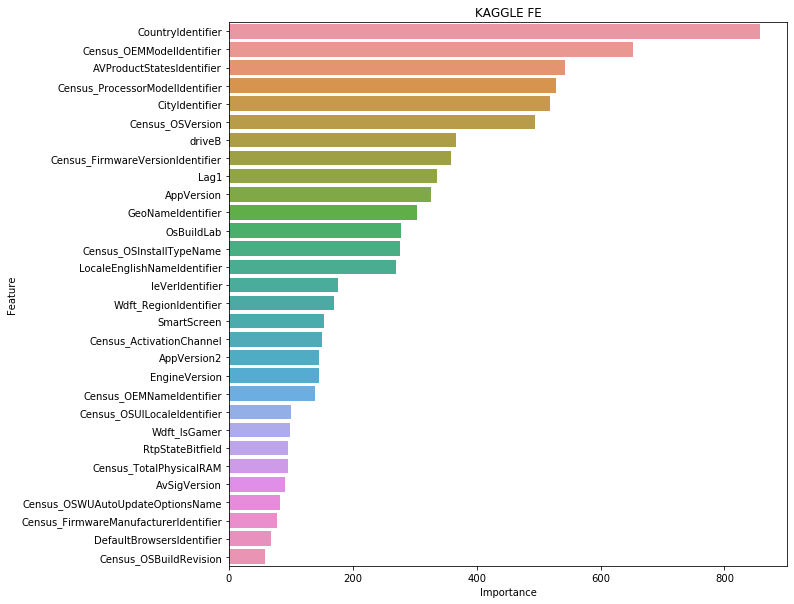

In [37]:
plt.figure(figsize = (10,10))
sns.barplot(data = kagg_df.sort_values(by = "Importance", ascending = False).head(30),
            y = 'Feature', x = "Importance")
plt.title("KAGGLE FE")

Kaggle Preprocessing without touching the test set

In [ ]:
kagg_unseen_params = {'subsample': 0.9, 'reg_alpha': 10, 'num_leaves': 110, 'n_estimators': 200,
                      'min_child_samples': 1500, 'learning_rate': 0.1, 'colsample_bytree': 0.6,
                      'boosting_type': 'gbdt'}

In [31]:
kagg_unseen_feats = ['EngineVersion', 'AppVersion', 'AvSigVersion', 'RtpStateBitfield',
                     'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier', 'AVProductsInstalled',
                     'AVProductsEnabled', 'CountryIdentifier', 'CityIdentifier',
                     'OrganizationIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier',
                     'Platform', 'Processor', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
                     'OsBuildLab', 'SkuEdition', 'IsProtected', 'IeVerIdentifier', 'SmartScreen',
                     'Firewall', 'Census_MDC2FormFactor', 'Census_OEMNameIdentifier',
                     'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
                     'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier',
                     'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
                     'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive',
                     'Census_TotalPhysicalRAM', 'Census_ChassisTypeName',
                     'Census_InternalPrimaryDiagonalDisplaySizeInInches',
                     'Census_InternalPrimaryDisplayResolutionHorizontal',
                     'Census_InternalPrimaryDisplayResolutionVertical', 'Census_PowerPlatformRoleName',
                     'Census_InternalBatteryType', 'Census_InternalBatteryNumberOfCharges',
                     'Census_OSVersion', 'Census_OSBranch', 'Census_OSBuildNumber',
                     'Census_OSBuildRevision', 'Census_OSEdition', 'Census_OSInstallTypeName',
                     'Census_OSUILocaleIdentifier', 'Census_OSWUAutoUpdateOptionsName',
                     'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_IsFlightingInternal',
                     'Census_FlightRing', 'Census_ThresholdOptIn', 'Census_FirmwareManufacturerIdentifier',
                     'Census_FirmwareVersionIdentifier', 'Census_IsSecureBootEnabled',
                     'Census_IsWIMBootEnabled', 'Census_IsTouchEnabled', 'Census_IsPenCapable',
                     'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer', 'Wdft_RegionIdentifier',
                     'AppVersion2', 'Lag1', 'driveA', 'driveB']

In [32]:
kagg_unseen_FI = [218,  419, 3441,  105,  171, 2061,   88,   26, 1540, 1092,   50,  412,  336, 0,
   16,   28,    6,    7,  449,   33,   29,  193,  182,   21,   31,  234, 1526,   23,
   10, 2414,   71,   51,   69,   39,   97,   34,   65,   41,   20,    7,    6,   64,
  885,   22,    3,    8,   41,  262,   94,   72,   50,  179,    3,   34,   16,   90,
 2628,   13,   17,    8,    4,    0,  115,  164,   96,  176,  518,  577]

In [33]:
kagg_unseen_df = pd.DataFrame({"Feature": kagg_unseen_feats, "Importance": kagg_unseen_FI})

Text(0.5, 1.0, 'FE + Unseen Test Set')

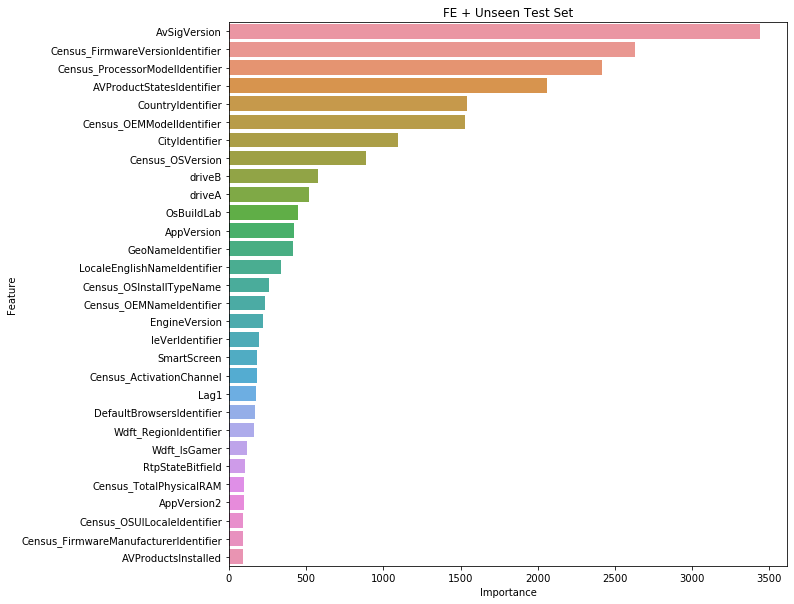

In [36]:
plt.figure(figsize = (10,10))
sns.barplot(data = kagg_unseen_df.sort_values(by = "Importance", ascending = False).head(30),
            y = 'Feature', x = "Importance")
plt.title("KAGGLE FE with Unseen Test Set")